<a href="https://colab.research.google.com/github/tugbargn/Machine-Learning-/blob/main/cloud_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np 
import pandas as pd
from keras.preprocessing import image
from PIL import Image
from scipy import misc
import seaborn as sns
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Softmax, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam, SGD, Adamax, Adagrad
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/swimcat',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/swimcat',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

class_names = train_generator.class_names
print(class_names)




Found 784 files belonging to 5 classes.
Using 628 files for training.
Found 784 files belonging to 5 classes.
Using 156 files for validation.
['pattern', 'sky', 'thick-dark', 'thick-white', 'veil']


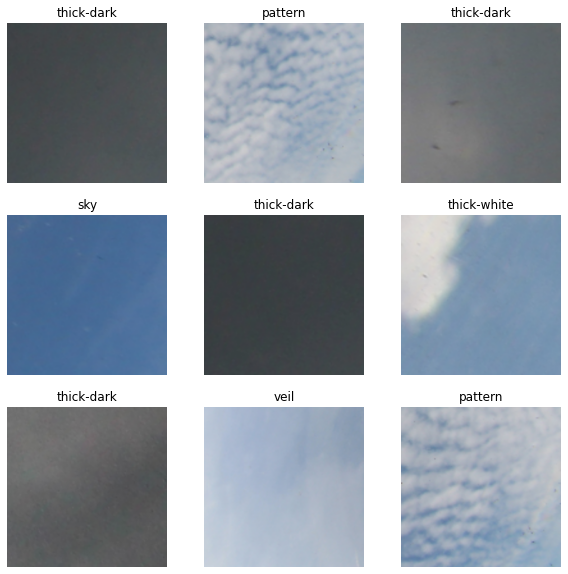

In [11]:
import matplotlib.pyplot as plt

#9 pictures in train set

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_generator = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_generator = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

(32, 224, 224, 3)
(32,)


In [16]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [17]:
epochs=10
history = model.fit(
  train_generator,
  validation_data=val_generator,
  epochs=epochs
)

Epoch 1/10
20/20 [==============================] - 71s 4s/step - loss: 1.6266 - accuracy: 0.3146 - val_loss: 1.1506 - val_accuracy: 0.5962
Epoch 2/10
20/20 [==============================] - 28s 1s/step - loss: 0.8436 - accuracy: 0.6596 - val_loss: 0.5134 - val_accuracy: 0.7628
Epoch 3/10
20/20 [==============================] - 28s 1s/step - loss: 0.5105 - accuracy: 0.7819 - val_loss: 0.4299 - val_accuracy: 0.8077
Epoch 4/10
20/20 [==============================] - 28s 1s/step - loss: 0.3844 - accuracy: 0.8177 - val_loss: 0.2914 - val_accuracy: 0.8910
Epoch 5/10
20/20 [==============================] - 28s 1s/step - loss: 0.2443 - accuracy: 0.9009 - val_loss: 0.2803 - val_accuracy: 0.9167
Epoch 6/10
20/20 [==============================] - 28s 1s/step - loss: 0.2677 - accuracy: 0.8985 - val_loss: 0.2359 - val_accuracy: 0.9038
Epoch 7/10
20/20 [==============================] - 28s 1s/step - loss: 0.3679 - accuracy: 0.8575 - val_loss: 0.3596 - val_accuracy: 0.8397
Epoch 8/10
20/20 [==

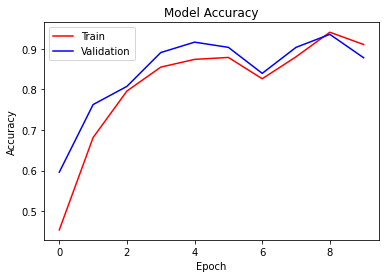

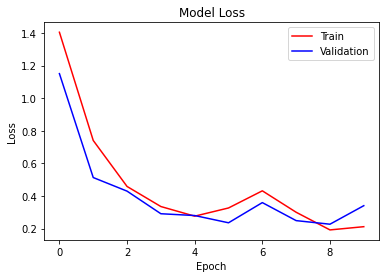

In [19]:
plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'],color = 'blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'best')
plt.show()

plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'],color = 'blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'best')
plt.show()